In [27]:
import pandas as pd
import scipy.stats
import seaborn as sn
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
import numpy

In [5]:
insurance_data = pd.read_csv('insurance.csv')
insurance_data_s = pd.read_csv('insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_data_s[['bmi','age']] = StandardScaler().fit_transform(insurance_data_s[['bmi','age']])

In [8]:
model1 = sm.ols('charges ~ bmi + age',data = insurance_data_s).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           7.39e-37
Time:                        14:11:16   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.327e+04    311.298     42.629      0.0

In [10]:
# Age has a bigger impact on the charges than BMI

In [11]:
pd.read_excel('video_games.xlsx')

,Sales,Review_Score,Used_Price,Release_Year,Length_All_PlayStyles_Polled
0,4690.0,85,24.95,2004,57
1,560.0,89,14.95,2004,5
2,540.0,81,22.95,2004,57
3,490.0,81,12.95,2004,0
4,450.0,61,14.95,2004,37
...,...,...,...,...,...
1202,30.0,71,17.95,2008,27
1203,30.0,62,17.95,2008,0
1204,30.0,51,15.95,2008,0
1205,20.0,64,17.95,2008,27


In [13]:
df = pd.read_excel('video_games.xlsx')

<Axes: xlabel='Review_Score', ylabel='Sales'>

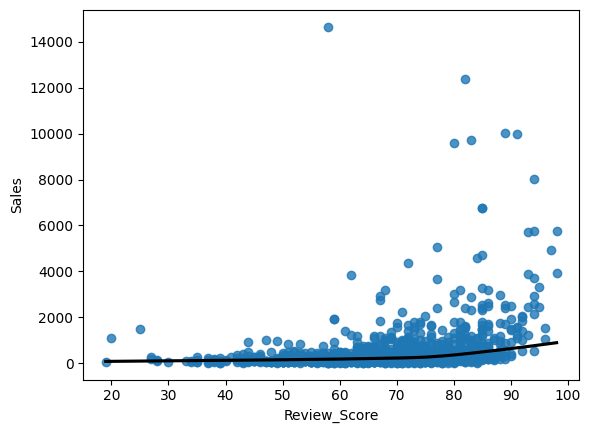

In [16]:
sn.regplot(x = df.Review_Score, y = df.Sales, lowess = True, line_kws={"color": "black"})

In [17]:
# A small exponential increase in Sales when the review score goes up

In [21]:
model_linear = sm.ols('Sales ~ Review_Score',data = df).fit()
print(model_linear.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     117.2
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           4.01e-26
Time:                        14:48:33   Log-Likelihood:                -10077.
No. Observations:                1207   AIC:                         2.016e+04
Df Residuals:                    1205   BIC:                         2.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1188.9206    159.225     -7.467   

In [23]:
Review_Score2 = pow(df.Review_Score,2)

In [25]:
model_polynomial = sm.ols('Sales ~ Review_Score+Review_Score2',data = df).fit()
print(model_polynomial.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     104.3
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.70e-42
Time:                        14:51:46   Log-Likelihood:                -10037.
No. Observations:                1207   AIC:                         2.008e+04
Df Residuals:                    1204   BIC:                         2.010e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3432.3939    529.010      6.488

In [28]:
logReview_Score = numpy.log(df.Review_Score)

In [29]:
model_log = sm.ols('Sales ~ logReview_Score',data = df).fit()
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     87.23
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           4.52e-20
Time:                        14:54:32   Log-Likelihood:                -10091.
No. Observations:                1207   AIC:                         2.019e+04
Df Residuals:                    1205   BIC:                         2.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5043.4891    594.824     

In [30]:
# Polynomial has the highest R-Squared and thus has the best results
